# Import

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.spatial.distance import cdist,pdist
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
import math
from scipy.cluster.hierarchy import cophenet,ward,single,complete,average,centroid

from warnings import filterwarnings
filterwarnings('ignore')

# Read the data

In [21]:
df = pd.read_csv('bank_marketing_part1_Data.csv')
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


# Exploratory Data Analysis

In [22]:
print('Shape: {}'.format(df.shape))
df.head()

Shape: (210, 7)


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [23]:
df.shape

(210, 7)

There are 7 features and we have 210 records

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


All the 7 features are of numeric data type.

## Missing Values Detection

In [25]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

We don't have any missing values for the given data set, hence missing values treatment is not necessary.

## Descriptive Statistical Analysis

Feature Details
1. spending: Amount spent by the customer per month (in 1000s)
2. advance_payments: Amount paid by the customer in advance by cash (in 100s)
3. probability_of_full_payment: Probability of payment done in full by the customer to the bank
4. current_balance: Balance amount left in the account to make purchases (in 1000s)
5. credit_limit: Limit of the amount in credit card (10000s)
6. min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7. max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [26]:
df_act = df.copy()
for col,mul_amt in zip(df.columns, [1000, 100, 1, 1000, 10000, 100, 1000]):
    df_act[col] = df_act[col]*mul_amt
df_act.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0


In [27]:
df_act.describe().round(2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.00,210.00,210.00,210.00,210.00,210.00,210.00
mean,14847.52,1455.93,0.87,5628.53,32586.05,370.02,5408.07
std,2909.70,130.60,0.02,443.06,3777.14,150.36,491.48
min,10590.00,1241.00,0.81,4899.00,26300.00,76.51,4519.00
25%,12270.00,1345.00,0.86,5262.25,29440.00,256.15,5045.00
50%,14355.00,1432.00,0.87,5523.50,32370.00,359.90,5223.00
75%,17305.00,1571.50,0.89,5979.75,35617.50,476.88,5877.00
max,21180.00,1725.00,0.92,6675.00,40330.00,845.60,6550.00


1. The customers spend on a average Rs 14,847 per month with a standard deviation of Rs 2,909. The spending per month ranges from Rs 10,590 to Rs 21,180. The mean and median are very close. Hence the distribution is not skewed.
2. The credit limit ranges from Rs 26,300 to Rs 40,330 with a mean and std dev of Rs 32,586 and Rs 3,777 respectively.
3. The mean probability of full payment is 0.87.
4. The mean current balance is Rs 5,628 and is closer to the median, hence the distribution is not skewed.
5. The max spending in a single shopping ranges from Rs 4,519 to Rs 6,550 with a mean of Rs 5,408.

## Univariate Analysis 

### Distribution Plot with Histogram

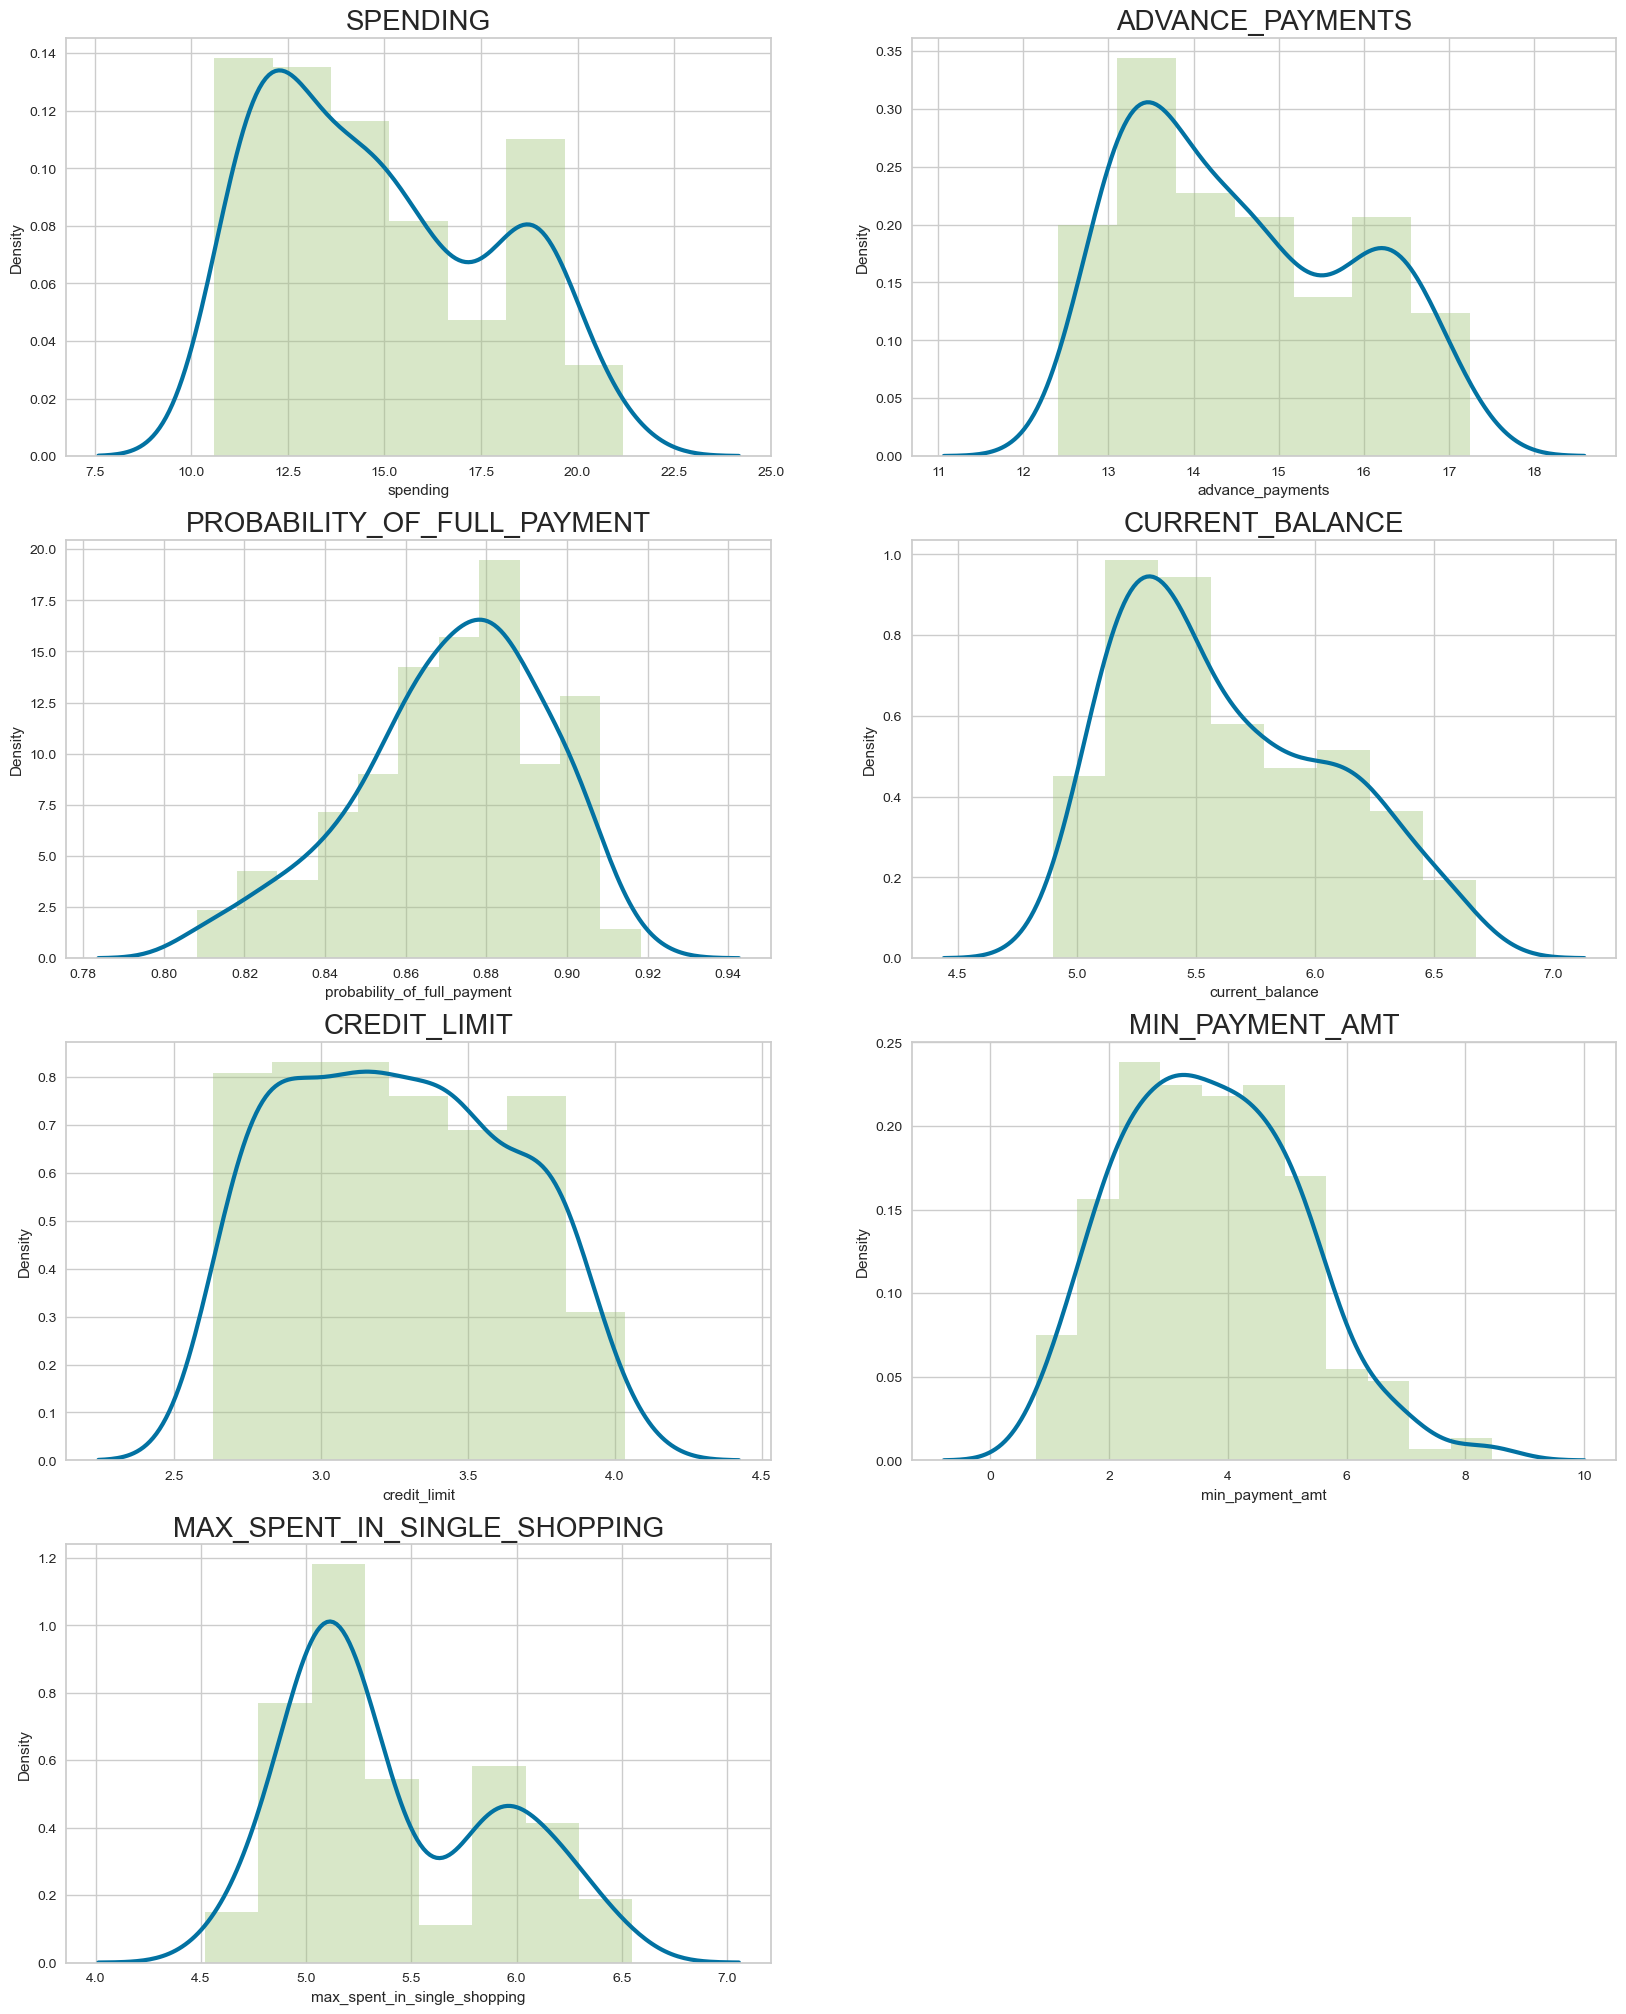

In [28]:
plt.figure(figsize=(20,25))
for i,col in enumerate(df.columns):
    plt.subplot(4, 2, i+1)
    sns.distplot(df[col], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(col.upper(), fontsize=20)

plt.show()

1. The distribution of spending, advance payments and max spent in single shopping are bimodal.
2. The distribution of credit limit is plateau-shaped.
3. The current balance and min payment amount distributions are close to normal
4. The probability of full payment distribution is slightly left-skewed and min-payment amount is slightly right-skewed.

### Box Plot

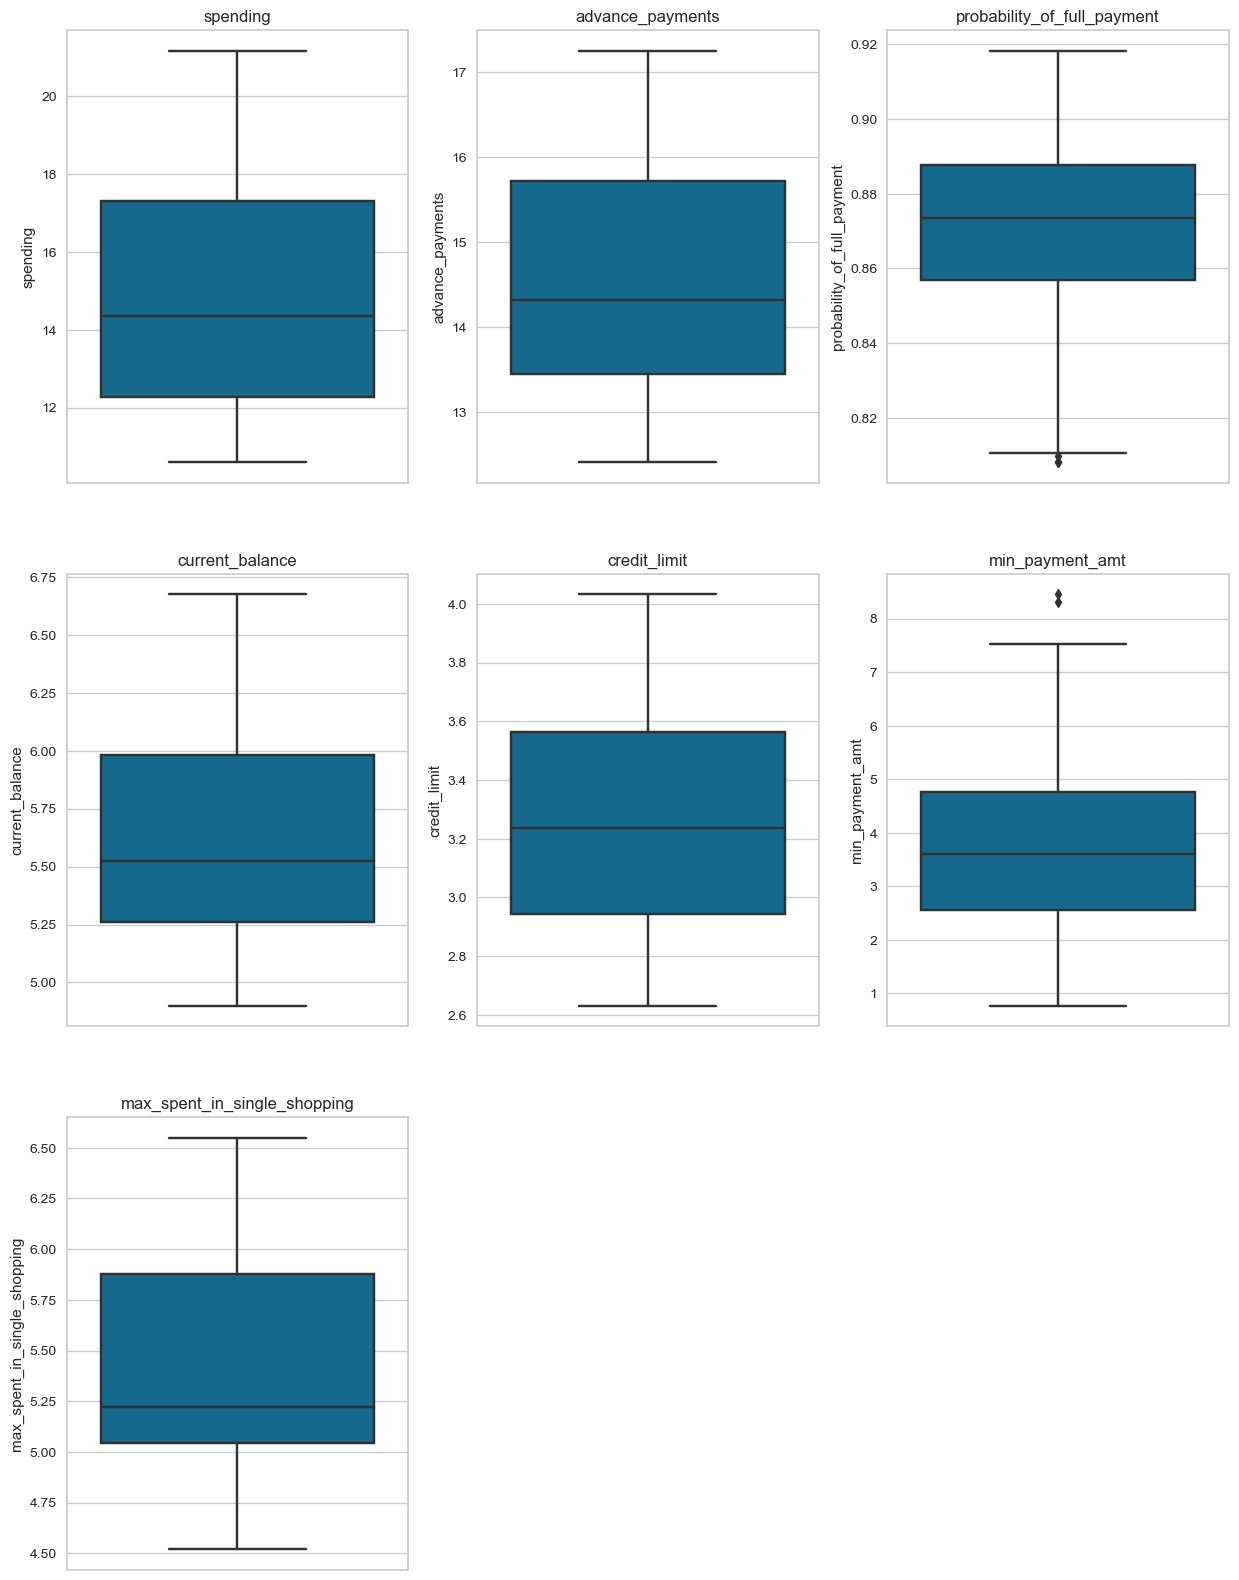

In [29]:
plt.figure(figsize=(15,20))
for i, col in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.show()

We notice few lower bound outliers for probability of full payment and few upper bound outliers for min payment.

## Skewness

In [30]:
# Check the skewness values quantitatively
df.skew().sort_values(ascending=False).round(1)

max_spent_in_single_shopping    0.6
current_balance                 0.5
min_payment_amt                 0.4
spending                        0.4
advance_payments                0.4
credit_limit                    0.1
probability_of_full_payment    -0.5
dtype: float64

1. The skewness is within the -0.5 to +0.5 range for all features except max_spent_in_single_shopping, which indicates they all are approximately symmetrical.
2. max_spent_in_single_shopping is moderately right skewed as it is within .5 and 1 range.

## Handling Outliers

### Outlier Detection

In [31]:
def detect_outliers(df):
    print('IQR Outliers percent')
    outlier_cols = []
    ubs = []
    lbs = []
    for col in df.columns:
        q1 = df[col].quantile(0.25) 
        q3 = df[col].quantile(0.75) 
        iqr = q3 - q1 
        ub = q3 + 1.5 * iqr 
        lb = q1 - 1.5 * iqr
        iqr_outliers = df[(df[col]<lb)|(df[col]>ub)].copy() 
        outliers_pct = len(iqr_outliers)/len(df)
        print('{} - {:.2%}'.format(col,outliers_pct)) 
        if outliers_pct != 0:
            outlier_cols.append(col)
            ubs.append(ub)
            lbs.append(lb)
    return outlier_cols,ubs,lbs
    
outlier_cols,ubs,lbs = detect_outliers(df_act)

IQR Outliers percent
spending - 0.00%
advance_payments - 0.00%
probability_of_full_payment - 1.43%
current_balance - 0.00%
credit_limit - 0.00%
min_payment_amt - 0.95%
max_spent_in_single_shopping - 0.00%


Probability of full payment has 1.43% of outliers and min payment amount has 0.95% of outliers, rest all features don't have any outliers. Let's cap these outliers.

### Capping the Outliers

We are choosing to cap the outliers as both KMeans and Hierarchial Clustering are sensitive to outliers.

In [32]:
out_df = df_act.copy() 
for col,ub,lb in zip(outlier_cols, ubs, lbs):
    out_df.loc[out_df[col] > ub, col] = ub 
    out_df.loc[out_df[col] < lb, col] = lb
out_df.head(2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0


The outliers has been capped

## Bivariate Analysis

### Heatmap

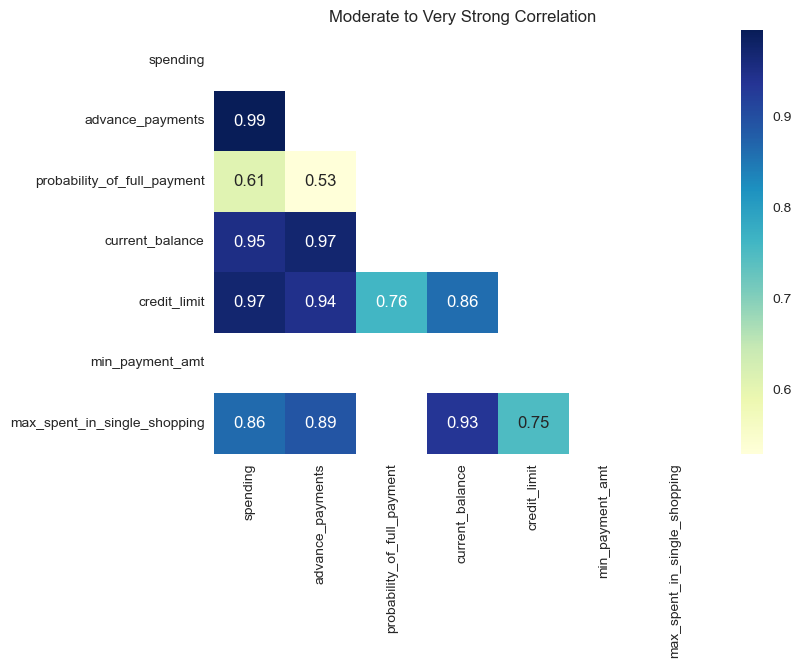

In [33]:
corr_df = df_act.corr()
cdf = corr_df[(corr_df>=0.4)|(corr_df<=-0.4)].copy()
mask = np.zeros_like(cdf.corr())
mask[np.triu_indices_from(mask)]=True
dataplot = sns.heatmap(cdf, mask=mask, cmap="YlGnBu", annot=True)
plt.title('Moderate to Very Strong Correlation')
plt.show()

There exists a very strong positive correlation between 
1. spending and advance payments, current balance, credit limit, max spent in single shopping
2. current balance and advance payments, credit limit, max spent in single shopping
3. credit limit and advance payments

There also exists a strong and moderate positive correlation between certain features.

This shows most of the features are highly correlated with each other. Hence we are using PCA to remove the redundant features.

### Pairplot

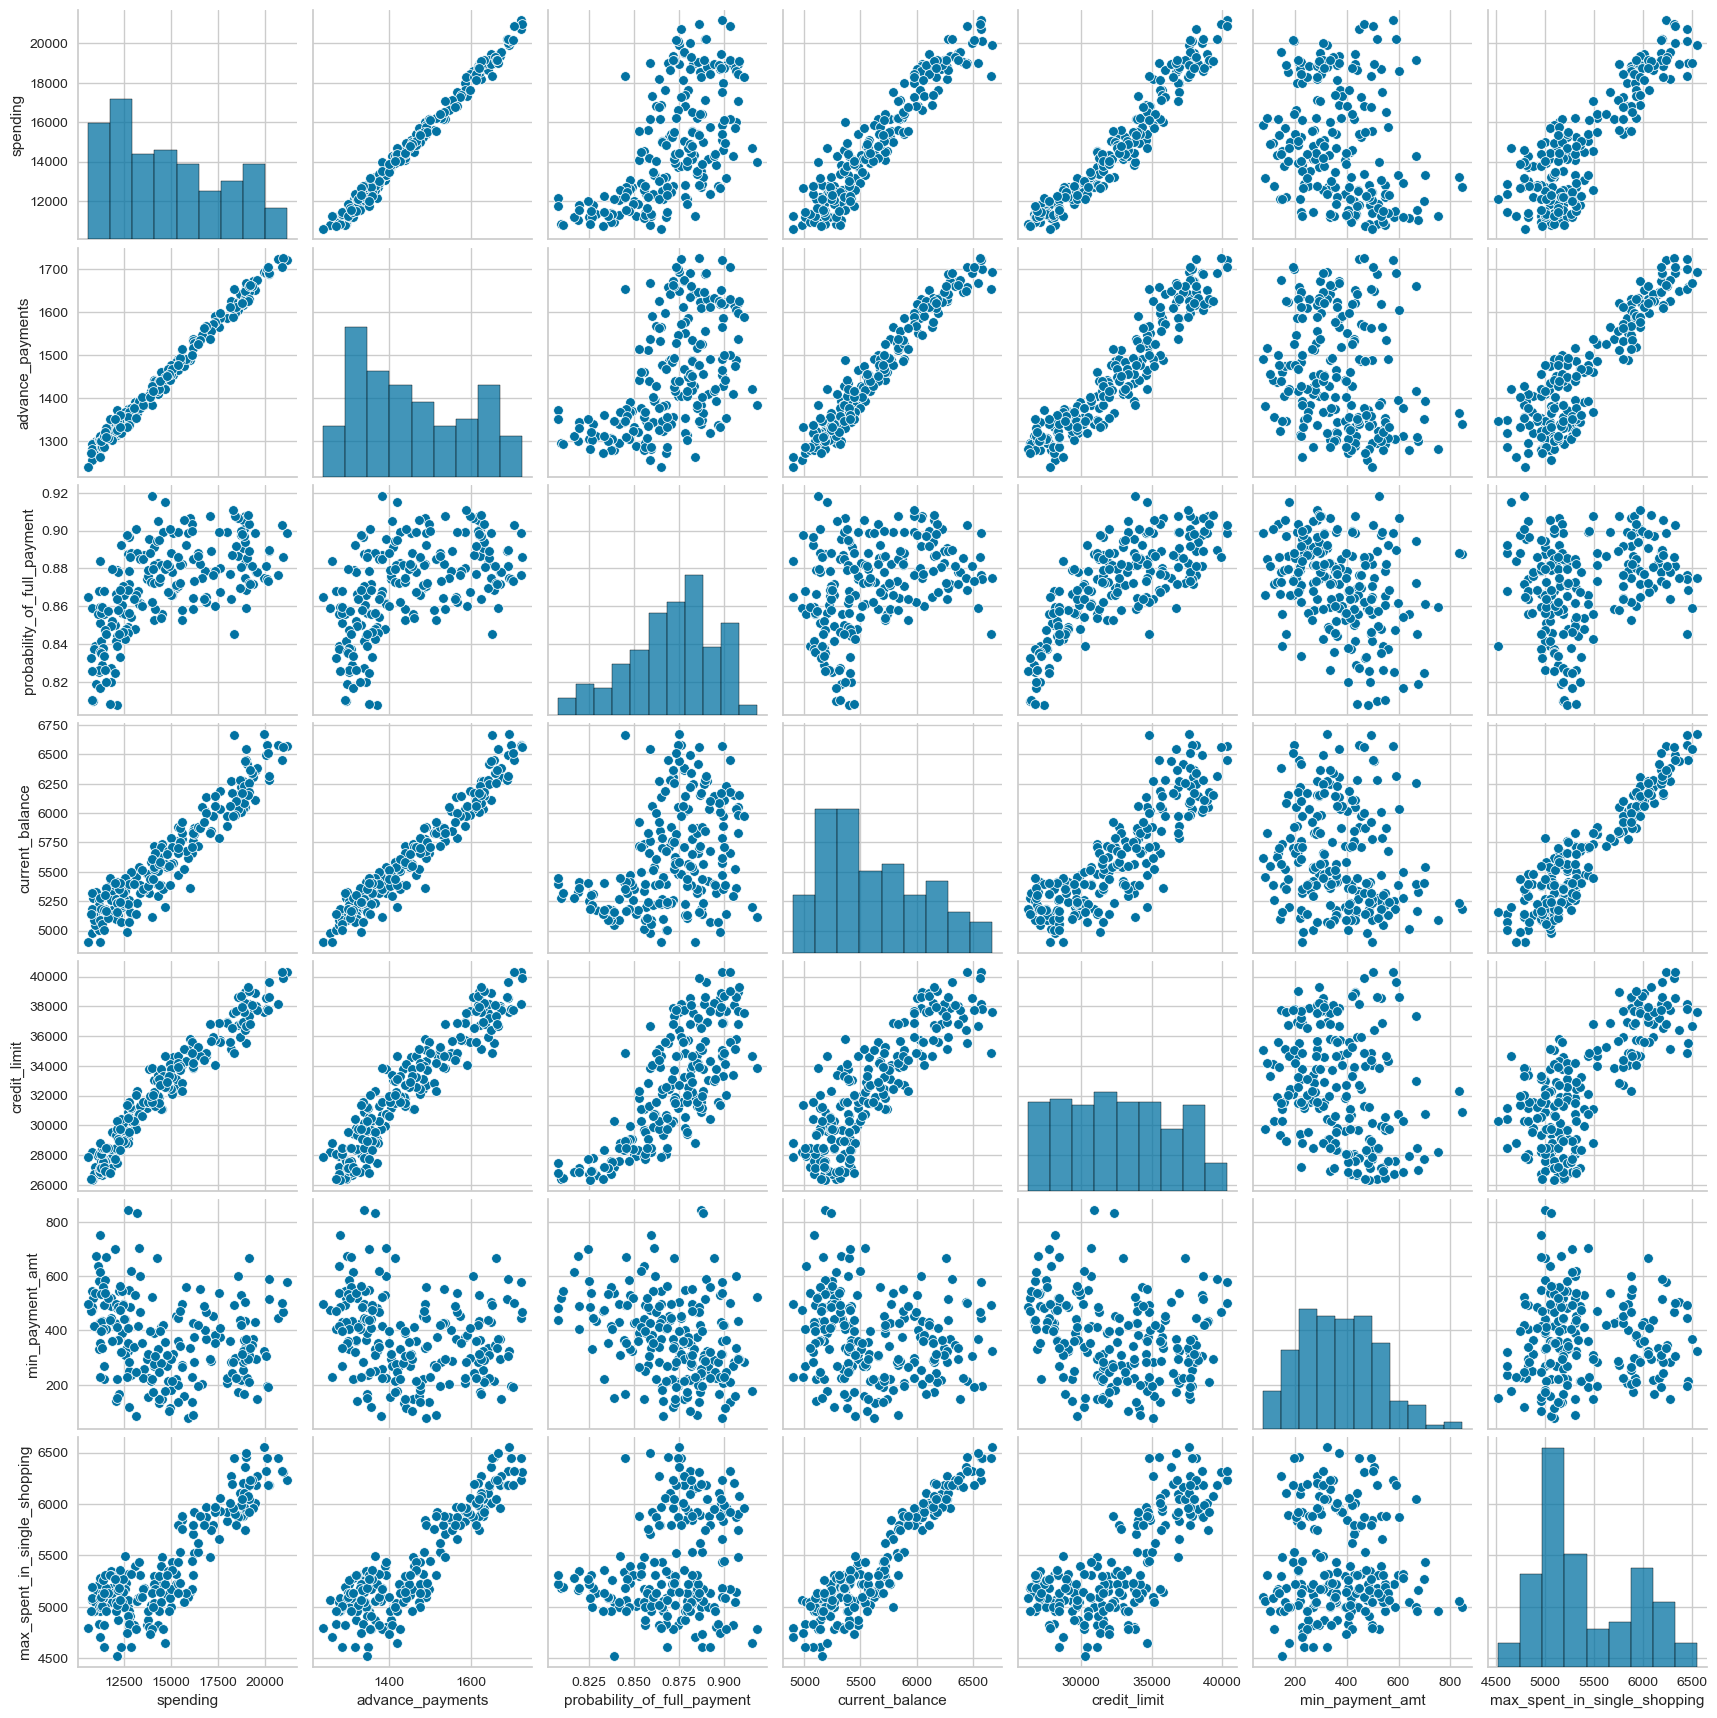

In [34]:
sns.pairplot(data=df_act)
plt.show()

Almost all the features share a linear relationship with each other except min payment amount and probability of full payment.

# Scaling

Scaling is required. Leaving variances unequal is equivalent to putting more weight on variables with smaller variances, so clusters will tend to be separated along variables with greater variance. As the variances are unequal for our data, feature scaling is necessary.

In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_sc = sc.fit_transform(out_df)
df_sc = pd.DataFrame(df_sc, columns=out_df.columns)
df_sc.describe().round(2).loc[['mean','std']]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
mean,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# PCA

We are doing PCA as we notice redundant features based on the heatmap. We need to use scaled data for PCA. 
PCA tries to get the features with maximum variance and the variance is high for high magnitude features.
This skews the PCA towards high magnitude features — which might lead to improper selection of principle components.
That’s why we require feature scaling before applying PCA.

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(df_sc)
principalComponents

array([[ 4.14792957e+00, -1.10202941e+00, -8.64952833e-01],
       [ 6.41803423e-01,  1.36535110e+00,  1.20633254e+00],
       [ 3.17287854e+00, -4.36998599e-01, -2.15845616e-01],
       [-3.20990186e+00, -1.79006356e+00, -9.93462059e-01],
       [ 2.47343213e+00,  9.87296318e-01, -8.21673703e-02],
       [-1.81568513e+00, -1.17388843e+00,  2.76506404e+00],
       [-2.00092875e+00, -5.68845322e-01, -3.42786344e-01],
       [-1.00815885e+00,  9.59176859e-01, -3.35766932e-03],
       [ 2.65528579e+00, -7.86315532e-01, -1.16963229e+00],
       [-2.72845320e+00, -2.12453900e-01, -5.78064216e-02],
       [ 2.83160864e+00,  6.58850435e-01, -7.46895398e-01],
       [-4.82933397e-01, -4.78318617e-01, -4.20393131e-01],
       [-1.84184446e+00, -4.54587089e-01, -8.26036192e-01],
       [ 3.35842381e+00, -5.69573257e-01, -1.50695023e+00],
       [-1.82578182e+00,  1.43869704e+00, -1.97762565e-01],
       [-1.69460678e+00, -1.30701352e-01,  1.31861035e+00],
       [ 1.10520341e+00,  2.07455497e+00

In [37]:
pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2','PC3'])
pca_df.head(2)

,PC1,PC2,PC3
0,4.147930,-1.102029,-0.864953
1,0.641803,1.365351,1.206333


# Hierarchial Clustering - Agglomerative

## Best linkage criterion and distance metric identification using Cophenetic Correlation Coefficient

In [38]:
# handles nan values while sorting

def myfunc(x):
    if math.isnan(x[2]):
        return 0
    else:
        return x[2]
    
metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 
           'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 
           'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']
cs = []
funcs = [single, complete, average, ward, centroid]

# computes the cophenetic correlation coefficient for all the linkage criterions and distance metrics 
# to identify the optimal one
for func in funcs:
    for metric in metrics:
        Y = pdist(pca_df, metric=metric) # Y: condensed distance matrix 
        Z = func(Y) # Z: linkage matrix containing the hierarchical clustering
        c = round(cophenet(Z, Y)[0]*100, 2)
        cs.append((str(func).split()[1], metric, c))

cs.sort(key=myfunc, reverse=True) # key= lambda x:x[2]
cs[:5]

[('average', 'correlation', 87.86),
 ('ward', 'correlation', 87.69),
 ('centroid', 'correlation', 87.62),
 ('single', 'correlation', 84.59),
 ('ward', 'cosine', 83.12)]

The linkage criterion **average** and the distance metric **correlation** has the highest cophenetic correlation coefficient value of **87.86%** (closer to 100% is preferred) among the 5 linkage criterions single, complete, average, ward and centroid and 20 distance metrics 'braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'. 

Hence we choose the linkage criterion as 'average' and the distance metric as 'correlation'.

## Dendrogram - Optimal K Identification

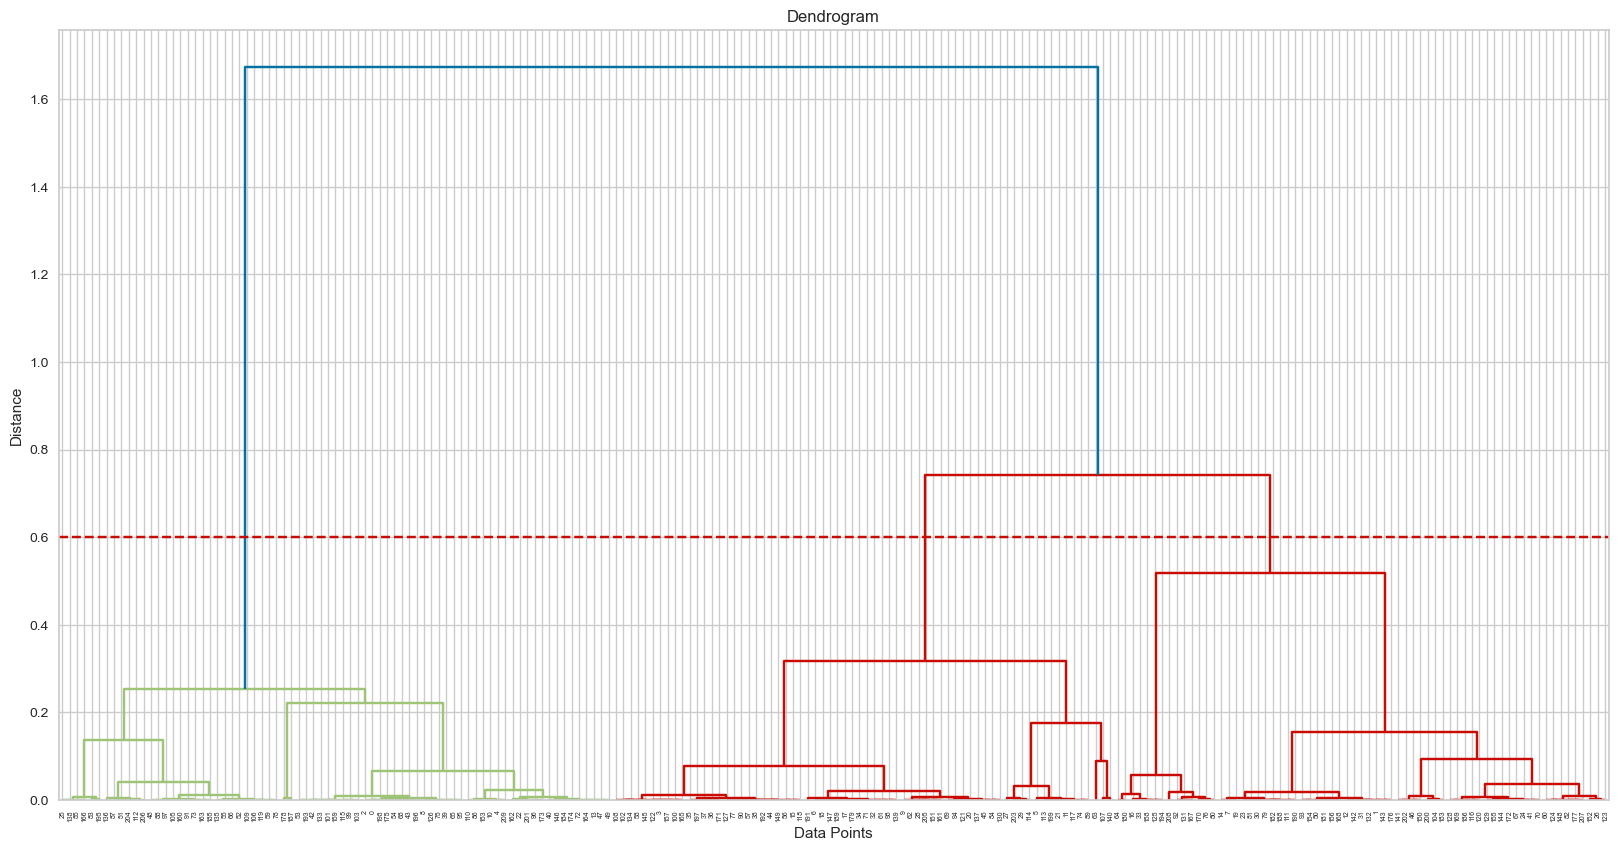

In [39]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(pca_df, method='average', metric='correlation'))
plt.axhline(y=0.6, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

The dendrogram suggests 3 as the optimal number of clusters as the horizontal line drawn across the longest vertical line at Distance 20, intersects the vertical line in 3 places. We choose draw the horizontal line at distance 20 as the vertical lines below that are not long enough. The longer the vertical line, the farther the clusters from each other. And it is also visually evident that there exist 3 big clusters.

## Build the model

In [40]:
# Hierachial Clustering - Bottom up approach with PCA
hc_pca = AgglomerativeClustering(n_clusters = 3,  affinity='correlation', linkage='average')
hc_pca.fit(pca_df)

df_clu = df_act.copy()
df_clu = pd.concat([df_clu, pca_df], axis=1)
df_clu['pca_hc_cluster'] = hc_pca.labels_
df_clu.head(2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,PC1,PC2,PC3,pca_hc_cluster
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,4.147930,-1.102029,-0.864953,1
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,0.641803,1.365351,1.206333,0


The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. We are using **average** linkage criterion which merges those 2 clusters which has **minimal average distance of all possible distances between the data points in one cluster to the data points in another cluster**.

> $D(r,s) = T_{rs} / ( N_{r} * N_{s})$ 

Where $T_{rs}$ is the sum of all pairwise distances between cluster r and cluster s. 

$N_{r}$ and $N_{s}$ are the sizes of the clusters r and s, respectively

And we use **correlation** as the distance metric used to compute the linkage.

The Correlation distance is computed by the formula:
> $Corr(X,Y) = Cov(X,Y)/(\sigma_{X}*\sigma_{Y})$

## Visualize the clusters

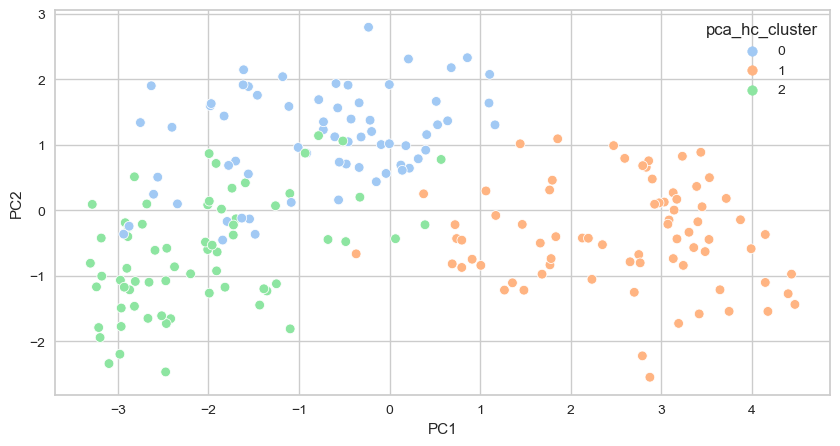

In [41]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_clu, x="PC1", y="PC2", hue="pca_hc_cluster", palette='pastel')
plt.show()

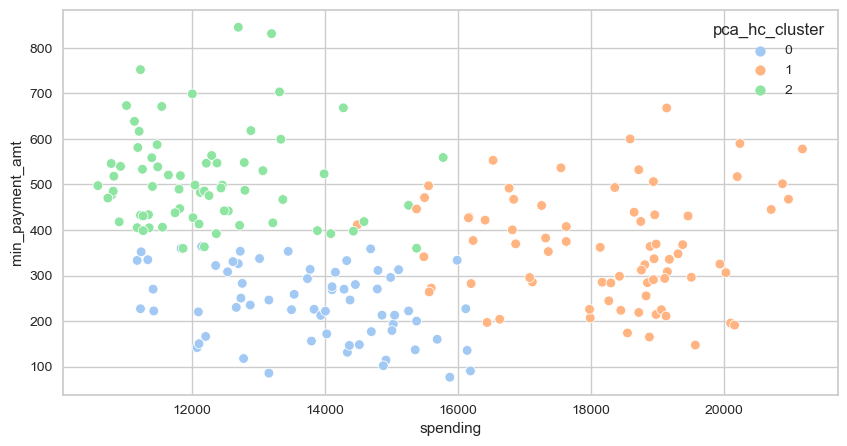

In [42]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_clu, x="spending", y="min_payment_amt", hue="pca_hc_cluster", palette='pastel')
plt.show()

In [43]:
df_clu['pca_hc_cluster'] = df_clu['pca_hc_cluster'].map({0: 'Medium', 1:'High', 2: 'Low'})
df_clu.head(2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,PC1,PC2,PC3,pca_hc_cluster
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,4.147930,-1.102029,-0.864953,High
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,0.641803,1.365351,1.206333,Medium


# KMeans - Centroid Based Clustering

## Elbow Method - Optimal K Identification

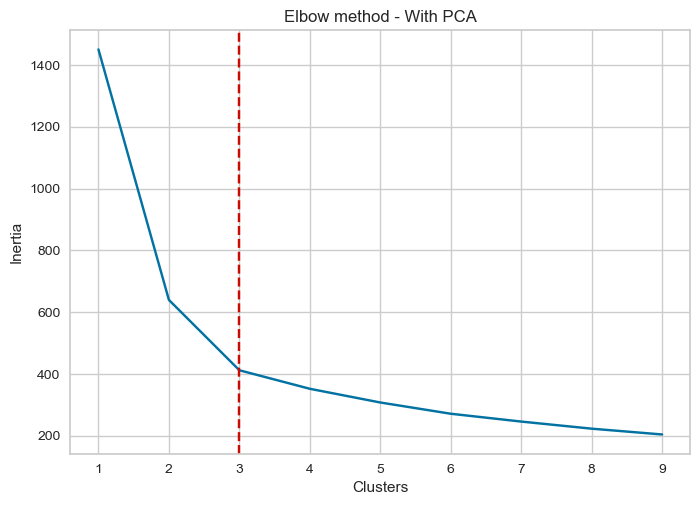

In [44]:
def elbow_plot(df,title):
    inertia = []
    distortion = []
    mapping1 = {}
    mapping2 = {}
    k = range(1,10)

    for i in k:
        km = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
        km.fit(df)
        inertia.append(km.inertia_)
        distortion.append(sum(np.min(cdist(df, km.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

        mapping1[i] = (km.inertia_)
        mapping2[i] = sum(np.min(cdist(df, km.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0]

    plt.plot(k, inertia,'-bx')
    plt.axvline(x=3,color='r', linestyle='--')
    plt.xlabel('Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow method - '+title)
    plt.show()
    
elbow_plot(pca_df, 'With PCA')

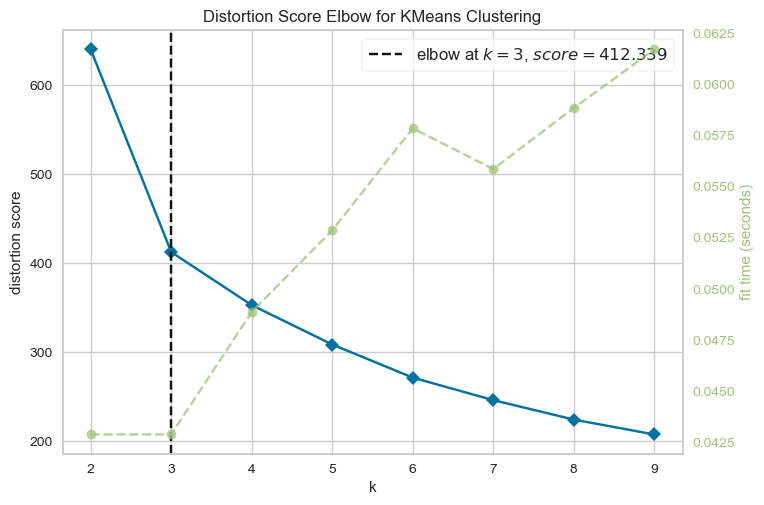

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion')
visualizer.fit(pca_df)   
visualizer.show() 

The Inertia/WSS decreases as K increases. WSS stands for Within-Sum-of-Squares. It is the total distance of data points from their respective cluster centroids. Distortion is the mean sum of squared distances to centers.
Silhouette score is the mean ratio of intra-cluster and nearest-cluster distance.

From the above plot, WSS and distortion reduces slowly after 3, hence selecting the optimal value for k as 3.

## Build the model

In [46]:
# with PCA
km3_pca = KMeans(n_clusters=3, random_state=0)
km3_pca.fit(pca_df)

df_clu['pca_km_cluster'] = km3_pca.labels_
df_clu.head(2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,PC1,PC2,PC3,pca_hc_cluster,pca_km_cluster
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,4.147930,-1.102029,-0.864953,High,1
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,0.641803,1.365351,1.206333,Medium,2


In [47]:
km3_pca.cluster_centers_

array([[-2.34057975, -0.63803458, -0.01555267],
       [ 2.80507922, -0.4186606 , -0.00631704],
       [-0.30221036,  1.01875994,  0.02121502]])

## Visualize the clusters

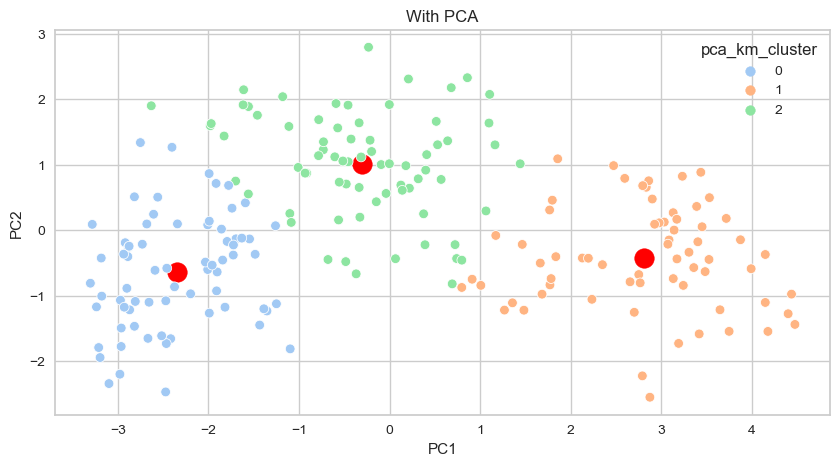

In [48]:
plt.figure(figsize=(10,5))
plt.scatter(km3_pca.cluster_centers_[:,0], km3_pca.cluster_centers_[:,1], s=200, c='red')
sns.scatterplot(data=df_clu, x="PC1", y="PC2", hue="pca_km_cluster", palette='pastel')
plt.title('With PCA')
plt.show()

In [49]:
df_clu['pca_km_cluster'] = df_clu['pca_km_cluster'].map({0: 'Low', 1:'High', 2: 'Medium'})
df_clu.head(2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,PC1,PC2,PC3,pca_hc_cluster,pca_km_cluster
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,4.147930,-1.102029,-0.864953,High,High
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,0.641803,1.365351,1.206333,Medium,Medium


## Silhouette Score

In [50]:
# Silhouette score for KMeans model
sil_scores = []
for i in range(2,8):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    sil_scores.append([i, silhouette_score(pca_df, km.labels_).round(2)])
    
sil_df = pd.DataFrame(sil_scores, columns=['NoOfClusters','Silhoutte Score'])
sil_df

,NoOfClusters,Silhoutte Score
0,2,0.47
1,3,0.41
2,4,0.34
3,5,0.30
4,6,0.29
5,7,0.27


## Silhouetee Visualizer

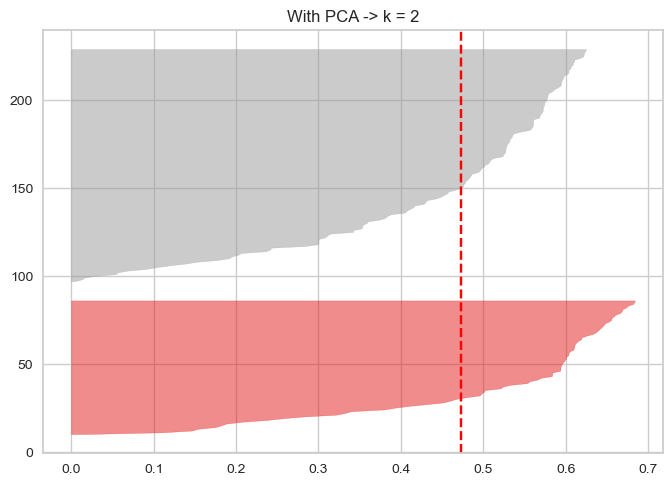

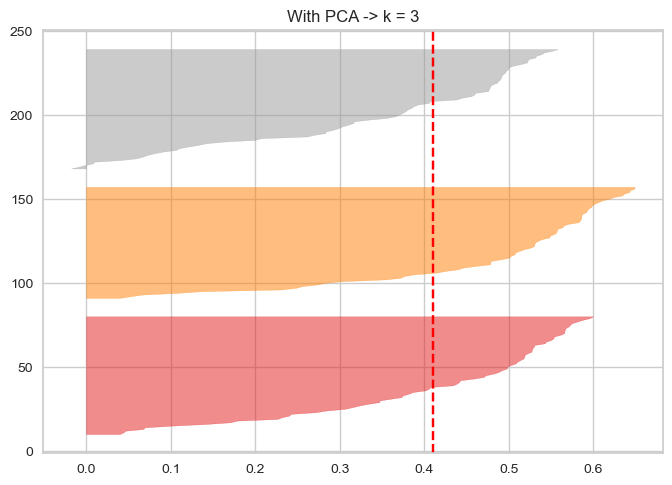

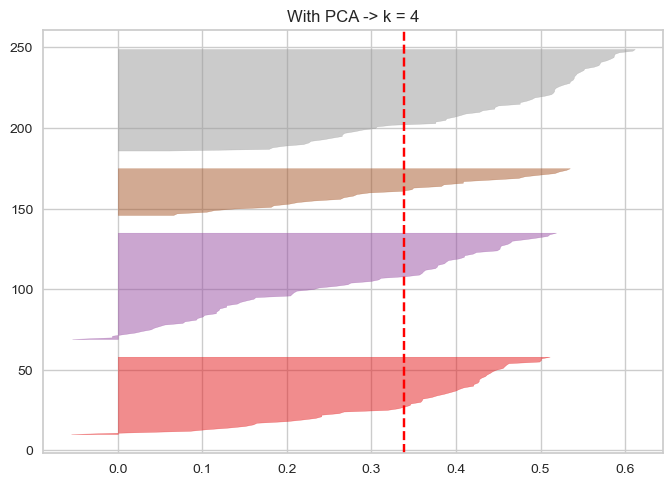

In [51]:
from yellowbrick.cluster import SilhouetteVisualizer

def silhou_visualize(df, title):
    for k in range(2,5):
        km1 = KMeans(n_clusters=k)
        sil_km = SilhouetteVisualizer(km1)
        sil_km.fit(df)
        plt.title(title + " -> k = " + str(k))
        plt.show()
        
silhou_visualize(pca_df,'With PCA')


## Which is the optimal k based on Silhouette Visualizer?

Though the Silhouette score suggests 2 as the optimal number of clusters as that has the highest silhouette score, if we look at the Silhouette Visualizer for k=2, the cluster 2 is wider than cluster 1, which indicates more data is grouped into 1 cluster. Whereas in the plot of k=3, all the clusters are of equal width, which indicates all the data is grouped equally into 3 clusters. Hence, we choose 3 as the optimal number of clusters.

# Visualize the clusters

## Scatterplot

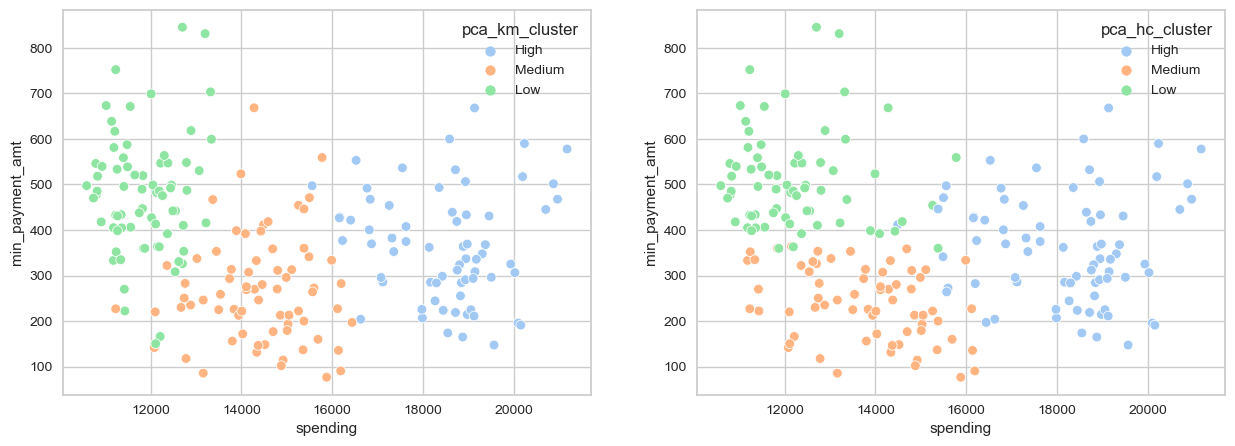

In [52]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df_clu, x="spending", y="min_payment_amt", hue="pca_km_cluster", palette='pastel')
plt.subplot(1,2,2)
sns.scatterplot(data=df_clu, x="spending", y="min_payment_amt", hue="pca_hc_cluster", palette='pastel')
plt.show()

We notice 3 groups of customers.
1. The Group Low Spending, has low Spending but high min payment amount, the cluster is dense in the middle and sparse in the upper and lower boundaries of the cluster.
2. The Group Medium Spending, the Spending is medium and the min payment is low, the cluster is dense except in the upper boundaries.
3. The Group High Spending, the spending is high and the min payment is medium, the cluster is dense except in the upper left corner of the cluster.

## Boxplot

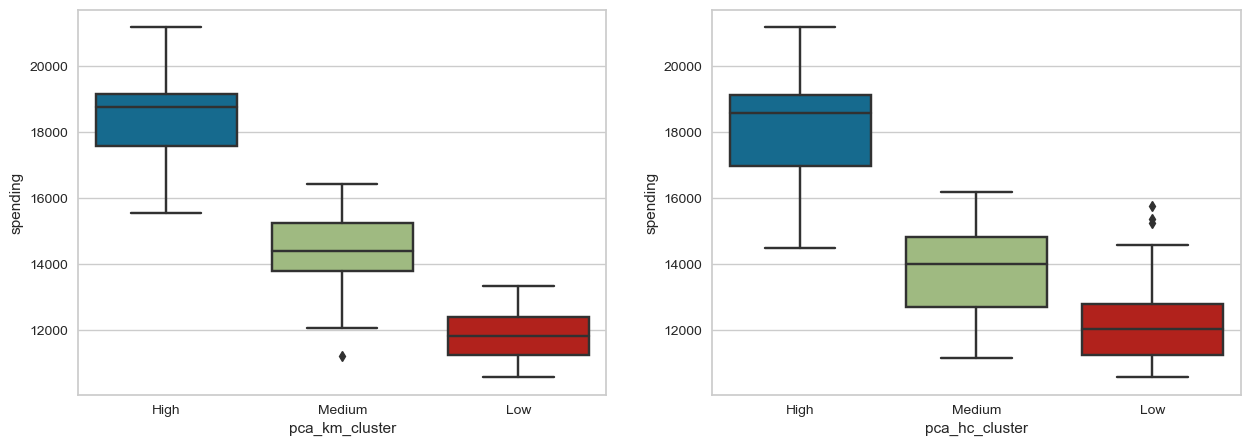

In [53]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(x="pca_km_cluster", y="spending", data=df_clu)
plt.subplot(1, 2, 2)
sns.boxplot(x="pca_hc_cluster", y="spending", data=df_clu)
plt.show()

* For cluster High Spending, the median line is closer to the top of the rectangle, which indicates the distribution of spending is slightly left skewed.
* For cluster Medium Spending, we have few lower bound outliers, which indicates the distribution of spending is slightly left skewed.
* For cluster Low Spending, the data is almost equally dispersed around the median, which indicates the distribution is almost symmetric.

# Cluster Group Profiles

Describe cluster profiles for the clusters defined Recommend different promotional strategies for different clusters in context to the business problem in-hand). After adding the final clusters to the original dataframe, do the cluster profiling. Divide the data in the finalized groups and check their means. Explain each of the group briefly. There should be at least 3-4 Recommendations. Recommendations should be easily understandable and business specific, learners should not give any technical suggestions. Full marks will only be allotted if the recommendations are correct and business specific. variable means. Learners to explain the profiles and suggest a mechanism to approach each cluster. Any logical explanation is acceptable.

Median could be best measure over mean, to determine the cluster characteristics, as we notice outliers in the clusters in the boxplot visualization.

In [54]:
df_clu.groupby('pca_km_cluster').median().round()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,PC1,PC2,PC3
pca_km_cluster,,,,,,,,,,
High,18750.0,1623.0,1.0,6153.0,37190.0,362.0,6009.0,3.0,-0.0,-0.0
Low,11830.0,1327.0,1.0,5226.0,28360.0,482.0,5089.0,-2.0,-1.0,-0.0
Medium,14405.0,1438.0,1.0,5534.0,32515.0,261.0,5122.0,-0.0,1.0,0.0


In [55]:
df_clu['pca_km_cluster'].value_counts(normalize=True).round(2)

Medium    0.34
Low       0.34
High      0.32
Name: pca_km_cluster, dtype: float64

We can categorize the clusters into 
 1. Low Spending and High Min Payment
 2. Medium Spending and Low Min Payment
 3. High spending and Medium Min Payment
 
We notice that there are almost equal number of customers in each of the clusters

1. **Low Spending and High Min Payment Cluster Characteristics**

The cluster has low Spending but high min payment amount, which indicates though they spend less, they convert most of their purchases to EMI. This may indicate lower middle-class category of customers. The average spending per month of this cluster is as low as Rs 11,830. The credit limit, advance payment and max spent in single shopping is also low for this cluster. 34% of the customers belong to this cluster.

     Promotional Strategy:
* We can verify their recent payslip, and check if we can offer them an increase in their credit limit and cash limit, thereby helping them make more purchases or withdraw more money from their credit card.
* The higher min payment amount indicates they are availing more EMI options, hence we can slash down the interest rates to help them opt for more EMI options which thereby also could increase their max spent in single shopping. 
* We can lower the cash advance fee payment, thereby helping them make more cash withdrawals from their credit card.

2. **Medium Spending and Low Min Payment Cluster Characteristics**

The Spending is medium and the min payment is low, which indicates though they spend enough, they don't convert much of their transactions to EMI. This may indicate middle-class group of customers. The average spending per month of this cluster is medium of Rs 14,405. The credit limit and advance payment is also medium for this cluster. The max spent in single shopping is low for this cluster. 34% of the customers belong to this cluster.

    Promotional Strategy:
* Can be offered customized credit cards with customized discounts based on the kind of purchases they make the most, to help them save money and thereby increase their frequency of purchases.
* We can verify their recent payslip, and check if we can offer them an increase in their credit limit and cash limit, thereby helping them make more purchases or withdraw more money from their credit card.
* We can provide EMI options for purchases above Rs 3000 with lower interest rates thereby we can increase their max spent in single shopping. 
* We can lower the cash advance fee payment, thereby helping them make more cash withdrawals from their credit card.

3. **High Spending and Medium Min Payment Cluster Characteristics**

The spending is high and the min payment is medium, which indicate they are spending high and converting some of their transactions to EMI. They may be the elite and high-class group of customers. The average spending per month of this cluster is as high as Rs 18,750. The current balance, credit limit and max spent in single shopping is high for this cluster compared to the other 2 clusters. 32% of the customers belong to this cluster.

    Promotional Strategy:
* This group is performing best among all customers, hence giving rewards points for the purchases and providing attractive shopping discount vouchers for the reward points will make them do more and better purchases.
* Can be given customized credit cards with customized discounts based on the kind of purchases they make the most, to help them save money and thereby increase their frequency of purchases.

## What better can be done?

We can collect more data such as where they are spending more, like in restaurants, or textile shopping, or grocery shopping or online purchases, or in education or if they spending much in tours and travels and offer them customized credit cards options with discounts on the respective category of spending.

We can capture their credit score, and offer loan facilities for those with good credit score.

We can capture their monthly average credit limit utilization, and their debit card usage and suggest them ways to enhance their credit card usage, thereby earning reward points.